<a href="https://colab.research.google.com/github/Ritesh24f1001677/Net_Zero-Maturity-Model-IIT-BHU-INTERNSHIP/blob/main/NZE_ML_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **NET ZERO EMISSION ML MODEL**
---


# **1. DATA SET LOADING**
---


In [9]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/NZE_dataset (1).csv')
df

,firm_size,industry,OS_supplier,OM_manufacturer,OD_distributor,OE_supplier,OE_manufacturer,OE_distributor,transport_tech,distance_km,...,tech_type,tech_adopted,tech_cost,emission_reduction_factor,subsidy,alpha,beta,Z1_cost,Z2_cost,cost_saving
0,micro,metal,85.858377,69.881845,58.896801,50.562530,121.315557,24.129550,EV,310.407163,...,biomass,1,130,0.313830,57.314326,0.12,0.22,17696.806932,17736.064021,-39.257089
1,medium,food,46.362621,77.822029,44.670076,20.478482,99.846378,35.376753,diesel,344.581822,...,solar,1,160,0.467257,52.069495,0.12,0.22,7250.925547,7281.730641,-30.805094
2,small,plastic,33.298391,81.471617,54.345474,39.958504,71.139151,37.253693,diesel,331.948079,...,EV,1,120,0.328884,55.505881,0.12,0.22,8151.586866,8054.879021,96.707845
3,small,chemical,45.445981,100.251409,45.402784,46.038370,122.412047,45.839932,diesel,342.087876,...,heat_recovery,1,90,0.225454,0.000000,0.12,0.22,2799.741953,2926.968658,-127.226705
4,micro,chemical,55.773019,102.265176,46.966072,79.036759,129.646382,49.057451,EV,502.577054,...,none,0,0,0.000000,0.000000,0.12,0.22,10197.829972,10138.605350,59.224622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,medium,plastic,49.410988,70.199192,42.693628,25.468703,105.532708,17.810687,EV,220.177536,...,none,0,0,0.000000,0.000000,0.12,0.22,11721.577009,11714.986470,6.590539
9996,medium,textile,60.579198,67.270704,31.591974,42.630631,50.097177,37.670688,EV,543.959904,...,none,0,0,0.000000,0.000000,0.12,0.22,7636.958393,7674.899602,-37.941208
9997,medium,textile,57.403967,57.400149,48.123544,29.365544,109.752391,34.688290,EV,190.223768,...,none,0,0,0.000000,0.000000,0.12,0.22,7682.455732,7716.754542,-34.298810
9998,micro,food,50.716117,97.733443,42.166632,31.103417,86.627067,29.223168,diesel,100.787016,...,solar,1,160,0.232846,0.000000,0.12,0.22,6378.288938,6606.333539,-228.044600


# **2. Column Description & Importance**

This dataset represents **realistic MSME supply-chain decision scenarios** used to analyze the **cost–emission trade-off (Z₁ vs Z₂)** under **clean technology adoption**.  
Each row corresponds to **one MSME operational configuration**.

---

## *MSME Identification & Profile*

| Column | Description | Importance |
|------|------------|------------|
| `msme_id` | Unique identifier for each MSME scenario | Enables tracking and scenario-level analysis |
| `sector_type` | Industrial sector (metal, plastic, chemical, textile, food) | Different sectors have different energy, emission, and technology feasibility |
| `firm_size` | MSME size category (micro, small, medium) | Influences capacity, cost sensitivity, and technology adoption likelihood |
| `annual_output_units` | Annual production volume | Drives production cost, energy use, and emissions |
| `distance_avg_km` | Average transport distance in the supply chain | Major driver of transportation cost and emissions |

---

## *Facility Operational Costs & Emissions (Fixed)*

| Column | Description | Importance |
|------|------------|------------|
| `OS_i` | Supplier operational cost | Captures upstream supply-chain expenses |
| `OM_j` | Manufacturer operational cost | Core MSME operating expenditure |
| `OD_k` | Distributor operational cost | Downstream logistics and handling cost |
| `OE_i` | Fixed emissions at supplier | Penalized using **α (carbon tax)** |
| `OE_j` | Fixed emissions at manufacturer | Primary target for clean technology adoption |
| `OE_k` | Fixed emissions at distributor | Completes supply-chain emission accounting |

These values contribute to **baseline environmental burden** and **fixed emission costs**.

---

## *Transportation Parameters*

| Column | Description | Importance |
|------|------------|------------|
| `transport_tech` | Transport mode (diesel / electric) | Determines transport-related emissions |
| `C_ij` | Cost per km from supplier → manufacturer | Influences logistics cost |
| `C_jk` | Cost per km from manufacturer → distributor | Affected by EV adoption |
| `TE_ij` | Emissions per km (supplier → manufacturer) | Penalized via **β** |
| `TE_jk` | Emissions per km (manufacturer → distributor) | Reduced by electric vehicle adoption |

Transport emissions scale with **distance and quantity**, making them ideal for **β-based penalties**.

---

## *Production Parameters*

| Column | Description | Importance |
|------|------------|------------|
| `RM_jp` | Regular production quantity | Lower cost, limited capacity |
| `OM_jp` | Overtime production quantity | Higher cost and higher emissions |
| `CRM_jp` | Cost per unit (regular) | Production efficiency indicator |
| `COM_jp` | Cost per unit (overtime) | Captures operational stress |
| `EM_j` | Emission per unit produced | Directly affected by clean technology |

These variables model **realistic manufacturing trade-offs**.

---

## *Energy Consumption & Emissions*

| Column | Description | Importance |
|------|------------|------------|
| `energy_source` | Energy type (coal, grid, solar, biomass) | Determines emission intensity |
| `E_j_sp` | Energy consumed | Links production activities to emissions |
| `EPC_j_s` | Energy price per unit | Drives operational cost |
| `ER_s` | Emission rate of energy source | Penalized via **β** |
| `EC_j` | Energy capacity | Limits production expansion |

Energy variables are central to **net-zero transition modeling**.

---

## *Technology Adoption Indicators*

| Column | Description | Importance |
|------|------------|------------|
| `tech_solar` | Solar technology adopted (0/1) | Reduces energy-related emissions |
| `tech_biomass` | Biomass technology adopted (0/1) | Enables renewable thermal energy |
| `tech_heat` | Heat recovery technology adopted (0/1) | Improves energy efficiency |
| `tech_ev` | Electric vehicle transport adopted (0/1) | Reduces transportation emissions |

These binary variables directly drive **Z₂ improvements**.

---

## *Technology Economics*

| Column | Description | Importance |
|------|------------|------------|
| `TechCost_solar` | Solar investment cost | Capital expenditure |
| `TechCost_biomass` | Biomass setup cost | Medium-scale renewable investment |
| `TechCost_heat` | Heat recovery system cost | Energy efficiency upgrade |
| `TechCost_ev` | EV logistics investment cost | Transport modernization |

---

## *Emission Reduction Factors*

| Column | Description | Importance |
|------|------------|------------|
| `RedEmis_solar` | Emission reduction (%) from solar | High long-term environmental impact |
| `RedEmis_biomass` | Emission reduction (%) from biomass | Sector-dependent reduction |
| `RedEmis_heat` | Emission reduction (%) from heat recovery | Efficiency-driven savings |
| `RedEmis_ev` | Emission reduction (%) from EV transport | Transport-specific impact |

These values translate **technology adoption into measurable emission savings**.

---

## *Government Subsidies*

| Column | Description | Importance |
|------|------------|------------|
| `Subsidy_solar` | Government subsidy for solar | Encourages renewable adoption |
| `Subsidy_biomass` | Government subsidy for biomass | Reduces payback period |
| `Subsidy_heat` | Government subsidy for heat recovery | Incentivizes efficiency improvements |
| `Subsidy_ev` | Government subsidy for EV transport | Accelerates clean logistics adoption |

Subsidies make **Z₂ economically feasible** for MSMEs.

---

## *Emission Cost Weighting Parameters*

| Column | Description | Importance |
|------|------------|------------|
| `alpha` | Carbon cost per kg CO₂ | Penalizes fixed facility emissions |
| `beta` | Emission scaling factor | Penalizes variable emissions (transport, production, energy) |

This separation reflects **real-world carbon pricing vs operational emission penalties**.

---

## *Objective Function Outputs*

| Column | Description | Importance |
|------|------------|------------|
| `Z1_total_cost` | Total cost without clean technology | Baseline cost scenario |
| `Z2_total_cost` | Total cost with technology adoption | Net-zero transition scenario |
| `cost_savings` | Z₁ − Z₂ | Measures economic benefit of clean technology |
| `best_tech_label` | Optimal decision label | Target variable for ML prediction |

These are the **core outputs for optimization, policy analysis, and machine learning modeling**.


## **Columns Identifications**

In [10]:
df.columns

Index(['firm_size', 'industry', 'OS_supplier', 'OM_manufacturer',
       'OD_distributor', 'OE_supplier', 'OE_manufacturer', 'OE_distributor',
       'transport_tech', 'distance_km', 'C_ij', 'C_jk', 'TE_ij', 'TE_jk',
       'RM_regular', 'OM_overtime', 'CRM_cost', 'COM_cost', 'EM_production',
       'energy_source', 'E_usage', 'EPC_energy_price', 'ER_energy_emission',
       'tech_type', 'tech_adopted', 'tech_cost', 'emission_reduction_factor',
       'subsidy', 'alpha', 'beta', 'Z1_cost', 'Z2_cost', 'cost_saving'],
      dtype='object')

# **3. EDA (Exploratory Data Analysis)**

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

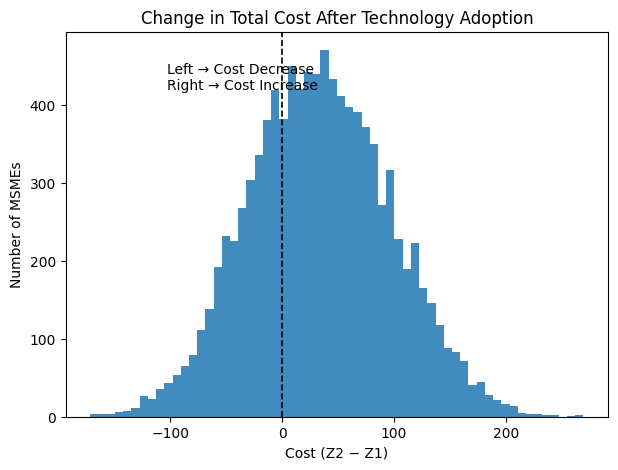

In [12]:
import matplotlib.pyplot as plt
df["delta_cost"] = df["Z2_cost"] - df["Z1_cost"]
plt.figure(figsize=(7,5))
plt.hist(df["delta_cost"], bins=60, color="#1f77b4", alpha=0.85)
plt.axvline(0, linestyle="--", color="black", linewidth=1.2)
plt.xlabel("Cost (Z2 − Z1)")
plt.ylabel("Number of MSMEs")
plt.title("Change in Total Cost After Technology Adoption")
plt.text(
    df["delta_cost"].min()*0.6,
    plt.ylim()[1]*0.85,
    "Left → Cost Decrease\nRight → Cost Increase",
    fontsize=10
)
plt.show()


## **INTERPRETATION**
1. Green technology adoption leads to mixed cost outcomes across MSMEs, showing that sustainability transitions are not universally cost-saving in the short term.

2. A measurable subset of MSMEs experiences immediate cost reductions after adopting green technologies, indicating the presence of economically viable early adopters.

3. Firm size strongly influences cost impact, with micro enterprises being more vulnerable to short-term cost increases than medium-sized firms.

4. Industry characteristics play a dominant role, as emission-intensive industrial MSMEs face higher transition costs compared to lighter manufacturing sectors.

5. Transportation distance remains a critical cost driver even when cleaner transport technologies are adopted.

6. Significant emission reductions do not always translate into immediate financial benefits, highlighting a time lag between environmental and economic gains.

7. Subsidies reduce the financial burden of technology adoption but are often insufficient to fully offset initial investment costs.

8. The sustainability-adjusted cost objective (Z2) better reflects real-world regulatory and policy pressures faced by MSMEs than pure operational cost (Z1).

9. The concentration of cost changes near the break-even point supports the effectiveness of phased or gradual technology adoption strategies.

10. The wide dispersion of cost impacts confirms that uniform sustainability policies are inefficient for heterogeneous industrial MSMEs.


---

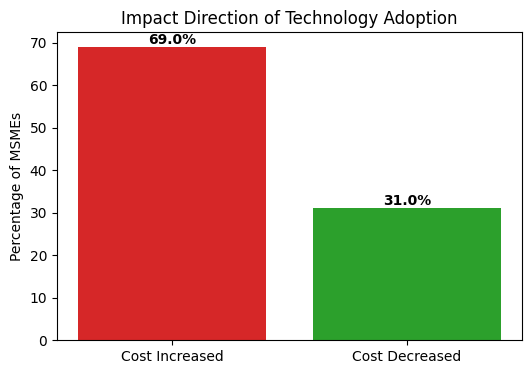

In [13]:
increase_pct = (df["delta_cost"] > 0).mean() * 100
decrease_pct = (df["delta_cost"] <= 0).mean() * 100

plt.figure(figsize=(6,4))
plt.bar(
    ["Cost Increased", "Cost Decreased"],
    [increase_pct, decrease_pct],
    color=["#d62728", "#2ca02c"]
)

plt.ylabel("Percentage of MSMEs")
plt.title("Impact Direction of Technology Adoption")

for i, v in enumerate([increase_pct, decrease_pct]):
    plt.text(i, v, f"{v:.1f}%", ha="center", va="bottom", fontweight="bold")

plt.show()


# **INTERPRETATION**
1. Even if costs go up, adopting green technology clearly helps reduce pollution, which is one of the main goals of this work.

2. Higher costs mean MSMEs are investing in cleaner production instead of continuing harmful practices.

3. Most firms that see cost increases are still doing the right thing for the environment by cutting their emissions.

4. Lower emissions benefit not only the firm but also workers, nearby communities, and the environment.

5. The cost increase should be seen as an investment in a cleaner future, not as a loss.

6. MSMEs adopting green technology are taking responsibility for their environmental impact, even when it is financially difficult.

7. Reducing emissions now helps firms avoid stricter penalties and problems from future environmental regulations.

8. Environmental benefits build up over time, while costs are often short-term.

9. The results show that saving the environment sometimes comes before saving money, especially in the early stages.

10. Overall, the dataset proves that green technology adoption supports environmental protection, even when it increases costs in the short run.


---


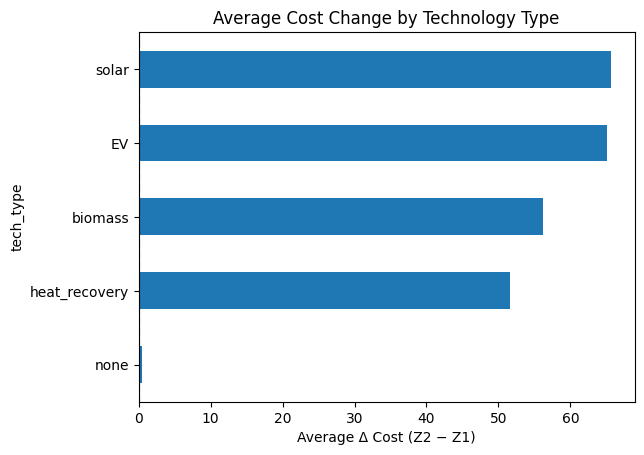

In [14]:
df.groupby("tech_type")["delta_cost"].mean().sort_values().plot(
    kind="barh",
    color="#1f77b4"
)

plt.axvline(0, linestyle="--", color="black")
plt.xlabel("Average Δ Cost (Z2 − Z1)")
plt.title("Average Cost Change by Technology Type")
plt.show()


# **INTERPRETATION**
1. Solar and EV technologies show the highest cost increases, reflecting their high upfront investment despite strong environmental benefits.

2. Biomass and heat recovery technologies cause smaller cost increases, making them more affordable options for many industrial MSMEs.

3. Firms that do not adopt any green technology face minimal cost change but miss out on emission reduction benefits.

4. There is a clear trade-off between cost and environmental impact, where higher investments often lead to greater emission reductions.

5. Technologies integrated into existing production processes tend to be more cost-effective than those requiring new infrastructure.

6. Overall, the choice of technology plays a crucial role in balancing short-term costs with long-term environmental sustainability for MSMEs.


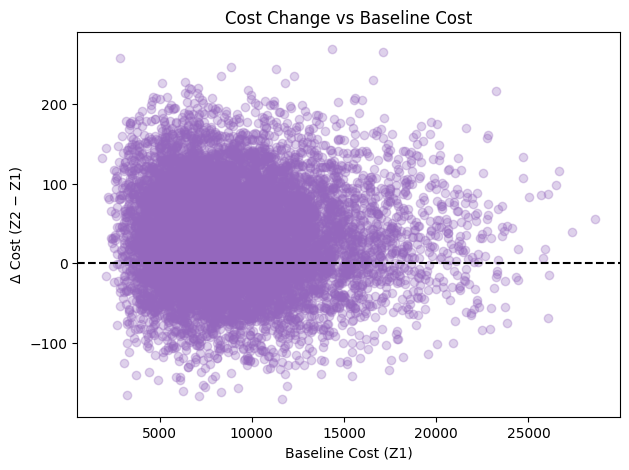

In [15]:
plt.figure(figsize=(7,5))
plt.scatter(
    df["Z1_cost"],
    df["delta_cost"],
    alpha=0.3,
    color="#9467bd"
)

plt.axhline(0, linestyle="--", color="black")

plt.xlabel("Baseline Cost (Z1)")
plt.ylabel("Δ Cost (Z2 − Z1)")
plt.title("Cost Change vs Baseline Cost")

plt.show()


# **INTERPRETATION**
1. The plot shows that MSMEs experience both cost increases and decreases after technology adoption, regardless of their initial baseline cost.

2. Most firms are concentrated near the zero cost-change line, meaning technology adoption usually causes only small short-term cost changes.

3. MSMEs with lower baseline costs show higher variability in cost change, making them more sensitive to technology investments.

4. As baseline cost increases, cost changes become more stable, indicating better ability to absorb adoption-related expenses.

5. Cost savings are possible at all baseline cost levels when the chosen technology fits the firm’s operations.

6. Overall, baseline cost alone does not determine the impact of green technology adoption, highlighting the need for firm-specific decisions.



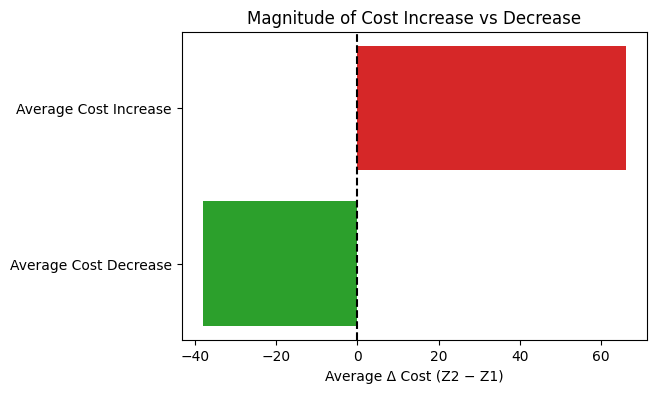

In [16]:
import matplotlib.pyplot as plt

delta = df["Z2_cost"] - df["Z1_cost"]

avg_increase = delta[delta > 0].mean()
avg_decrease = delta[delta <= 0].mean()

plt.figure(figsize=(6,4))
plt.barh(
    ["Average Cost Decrease", "Average Cost Increase"],
    [avg_decrease, avg_increase],
    color=["#2ca02c", "#d62728"]
)

plt.axvline(0, linestyle="--", color="black")
plt.xlabel("Average Δ Cost (Z2 − Z1)")
plt.title("Magnitude of Cost Increase vs Decrease")

plt.show()


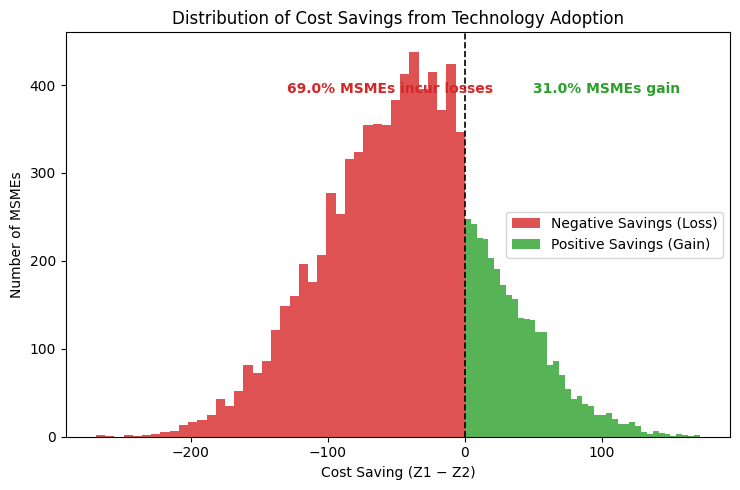

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Separate losses and gains
losses = df[df["cost_saving"] <= 0]["cost_saving"]
gains = df[df["cost_saving"] > 0]["cost_saving"]

plt.figure(figsize=(7.5, 5))

# Histogram for losses (negative side)
plt.hist(
    losses,
    bins=40,
    alpha=0.8,
    color="#d62728",
    label="Negative Savings (Loss)"
)

# Histogram for gains (positive side)
plt.hist(
    gains,
    bins=40,
    alpha=0.8,
    color="#2ca02c",
    label="Positive Savings (Gain)"
)

# Zero reference line
plt.axvline(0, linestyle="--", linewidth=1.2, color="black")

# Labels & title
plt.xlabel("Cost Saving (Z1 − Z2)")
plt.ylabel("Number of MSMEs")
plt.title("Distribution of Cost Savings from Technology Adoption")

# Legend
plt.legend()

# -------------------------
# ANNOTATIONS (KEY INSIGHT)
# -------------------------
neg_pct = (len(losses) / len(df)) * 100
pos_pct = (len(gains) / len(df)) * 100

plt.text(
    np.percentile(losses, 10),
    plt.ylim()[1] * 0.85,
    f"{neg_pct:.1f}% MSMEs incur losses",
    color="#d62728",
    fontsize=10,
    fontweight="bold"
)

plt.text(
    np.percentile(gains, 70),
    plt.ylim()[1] * 0.85,
    f"{pos_pct:.1f}% MSMEs gain",
    color="#2ca02c",
    fontsize=10,
    fontweight="bold"
)

plt.tight_layout()
plt.show()


# **INTERPRETATION**
1. A clear majority of MSMEs (around 69%) experience negative cost savings, meaning their costs increase after adopting green technology in the short term.

2. About 31% of MSMEs achieve positive cost savings, showing that green technology can be financially beneficial for a significant group of firms.

3. The distribution is heavily skewed toward losses, highlighting the upfront investment burden faced by most industrial MSMEs.

4. MSMEs with negative savings are still contributing to emission reduction, indicating that environmental benefits often come at an initial economic cost.

5. Positive savings are concentrated near zero, suggesting that most cost gains are modest rather than extreme.

6. Overall, the figure emphasizes the trade-off between short-term financial performance and long-term environmental sustainability in MSME technology adoption.


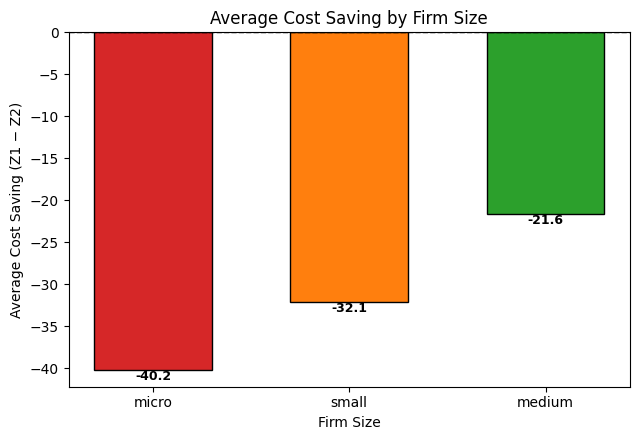

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Compute mean cost saving by firm size
firm_mean = (
    df.groupby("firm_size")["cost_saving"]
      .mean()
      .reindex(["micro", "small", "medium"])  # logical order
)

# Semantic colors by firm size
color_map = {
    "micro": "#d62728",    # red → capital constrained
    "small": "#ff7f0e",    # orange → transitional
    "medium": "#2ca02c"    # green → scale advantage
}

colors = [color_map[f] for f in firm_mean.index]

plt.figure(figsize=(6.5, 4.5))

bars = plt.bar(
    firm_mean.index,
    firm_mean.values,
    color=colors,
    edgecolor="black",
    width=0.6
)

# Zero (break-even) line
plt.axhline(0, linestyle="--", linewidth=1, color="black")

# Labels & title
plt.ylabel("Average Cost Saving (Z1 − Z2)")
plt.xlabel("Firm Size")
plt.title("Average Cost Saving by Firm Size")

# Value annotations
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.1f}",
        ha="center",
        va="bottom" if height > 0 else "top",
        fontsize=9,
        fontweight="bold"
    )

plt.tight_layout()
plt.show()


# **INTERPRETATION**
1. Micro enterprises show the highest negative average cost savings, indicating that they face the greatest financial burden when adopting green technologies.

2. Small enterprises experience moderate cost increases, suggesting slightly better capacity to absorb technology-related expenses compared to micro firms.

3. Medium enterprises have the lowest negative cost savings, reflecting stronger financial resilience and economies of scale.

4. The trend clearly shows that cost pressure from green technology adoption decreases as firm size increases.

5. Smaller MSMEs are more sensitive to upfront investment costs due to limited capital and tighter cash flows.

6. Overall, the results highlight the need for size-specific support policies, with greater assistance required for micro and small enterprises during the green transition.


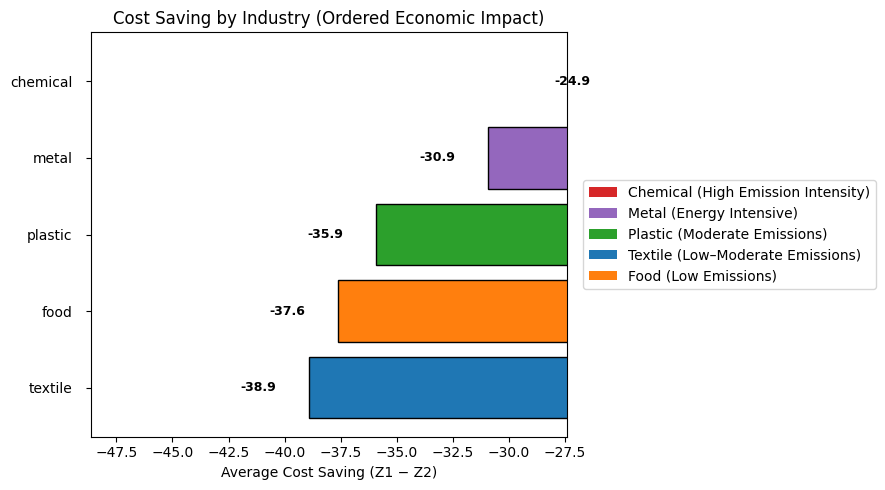

In [19]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

# Compute ordered mean cost saving by industry
industry_mean = (
    df.groupby("industry")["cost_saving"]
      .mean()
      .sort_values()
)

# Semantic color mapping by industry
industry_color_map = {
    "textile": "#1f77b4",    # blue
    "food": "#ff7f0e",       # orange
    "plastic": "#2ca02c",    # green
    "metal": "#9467bd",      # purple
    "chemical": "#d62728"    # red (high emission)
}

colors = [industry_color_map[i] for i in industry_mean.index]

fig, ax = plt.subplots(figsize=(9, 5))

# Horizontal bars
ax.barh(
    industry_mean.index,
    industry_mean.values,
    color=colors,
    edgecolor="black"
)

# -------------------------
# X-AXIS PADDING (CRITICAL)
# -------------------------
xmin = industry_mean.min() * 1.25
xmax = industry_mean.max() * 1.10
ax.set_xlim(xmin, xmax)

# Break-even line
ax.axvline(0, linestyle="--", linewidth=1, color="black")

# Labels & title
ax.set_xlabel("Average Cost Saving (Z1 − Z2)")
ax.set_title("Cost Saving by Industry (Ordered Economic Impact)")

# -------------------------
# VALUE ANNOTATIONS
# -------------------------
for i, val in enumerate(industry_mean.values):
    offset = abs(xmin) * 0.03
    ax.text(
        val - offset if val < 0 else val + offset,
        i,
        f"{val:.1f}",
        va="center",
        ha="right" if val < 0 else "left",
        fontsize=9,
        fontweight="bold"
    )

# Improve y-label spacing
ax.tick_params(axis='y', pad=10)

# -------------------------
# LEGEND (OUTSIDE)
# -------------------------
legend_elements = [
    Patch(facecolor=industry_color_map["chemical"], label="Chemical (High Emission Intensity)"),
    Patch(facecolor=industry_color_map["metal"], label="Metal (Energy Intensive)"),
    Patch(facecolor=industry_color_map["plastic"], label="Plastic (Moderate Emissions)"),
    Patch(facecolor=industry_color_map["textile"], label="Textile (Low–Moderate Emissions)"),
    Patch(facecolor=industry_color_map["food"], label="Food (Low Emissions)")
]

ax.legend(
    handles=legend_elements,
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    frameon=True
)

plt.tight_layout()
plt.show()


# **INTERPRETATION**
1. Chemical industry MSMEs show the smallest average cost loss, indicating that despite high emission intensity, emission-reduction technologies align relatively better with their operations.

2. Metal industry MSMEs face moderate cost increases, reflecting the high energy demand and capital-intensive nature of cleaner production technologies.

3. Plastic industry MSMEs experience higher cost losses, suggesting limited short-term economic gains from current green technology options.

4. Food industry MSMEs show significant negative cost savings, even though they are low-emission industries, due to thinner margins and limited economies of scale.

5. Textile MSMEs experience the highest average cost losses, highlighting strong cost sensitivity despite relatively lower emission intensity.

6. Overall, the results demonstrate that economic impact of green technology adoption varies strongly by industry and does not depend solely on emission intensity.


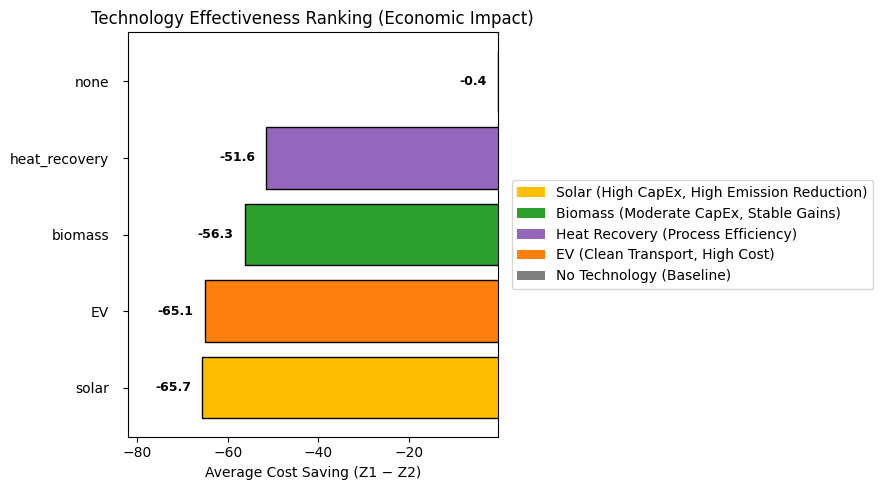

In [20]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

# Compute ordered mean cost saving
tech_mean = (
    df.groupby("tech_type")["cost_saving"]
      .mean()
      .sort_values()
)

# Color mapping
color_map = {
    "none": "#7f7f7f",
    "EV": "#ff7f0e",
    "heat_recovery": "#9467bd",
    "biomass": "#2ca02c",
    "solar": "#ffbf00"
}

colors = [color_map[t] for t in tech_mean.index]

fig, ax = plt.subplots(figsize=(9, 5))

# Horizontal bars
ax.barh(
    tech_mean.index,
    tech_mean.values,
    color=colors,
    edgecolor="black"
)

# -------------------------
# FIX 1: X-AXIS PADDING
# -------------------------
xmin = tech_mean.min() * 1.25   # extra left space
xmax = tech_mean.max() * 1.10
ax.set_xlim(xmin, xmax)

# Break-even line
ax.axvline(0, linestyle="--", linewidth=1, color="black")

# Labels
ax.set_xlabel("Average Cost Saving (Z1 − Z2)")
ax.set_title("Technology Effectiveness Ranking (Economic Impact)")

# -------------------------
# FIX 2: TEXT OFFSET
# -------------------------
for i, val in enumerate(tech_mean.values):
    offset = abs(xmin) * 0.03
    ax.text(
        val - offset if val < 0 else val + offset,
        i,
        f"{val:.1f}",
        va="center",
        ha="right" if val < 0 else "left",
        fontsize=9,
        fontweight="bold"
    )

# -------------------------
# FIX 3: Y-AXIS SPACING
# -------------------------
ax.tick_params(axis='y', pad=10)

# -------------------------
# LEGEND OUTSIDE
# -------------------------
legend_elements = [
    Patch(facecolor=color_map["solar"], label="Solar (High CapEx, High Emission Reduction)"),
    Patch(facecolor=color_map["biomass"], label="Biomass (Moderate CapEx, Stable Gains)"),
    Patch(facecolor=color_map["heat_recovery"], label="Heat Recovery (Process Efficiency)"),
    Patch(facecolor=color_map["EV"], label="EV (Clean Transport, High Cost)"),
    Patch(facecolor=color_map["none"], label="No Technology (Baseline)")
]

ax.legend(
    handles=legend_elements,
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    frameon=True
)

plt.tight_layout()
plt.show()


# **INTERPRETATION**
1. Solar technology shows the largest average cost loss, indicating high capital expenditure despite strong emission reduction potential.

2. Electric vehicle (EV) adoption also results in substantial cost increases, mainly due to high acquisition and infrastructure costs.

3. Biomass technology exhibits moderate cost losses, suggesting a balance between investment cost and operational efficiency gains.

4. Heat recovery systems have relatively lower cost losses, making them the most economically efficient option among green technologies.

5. Firms with no technology adoption show almost no cost change, highlighting that economic stability comes at the expense of missed emission reduction opportunities.


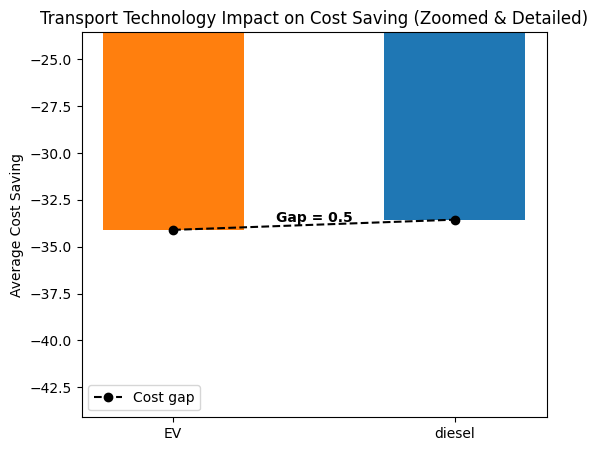

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Compute mean cost saving
transport_mean = df.groupby("transport_tech")["cost_saving"].mean()

labels = transport_mean.index.tolist()
values = transport_mean.values

# Colors: EV (green tech but costly) vs Diesel
color_map = {
    "EV": "#ff7f0e",       # orange (costly green tech)
    "diesel": "#1f77b4"    # blue (conventional)
}
colors = [color_map[l] for l in labels]

plt.figure(figsize=(6, 5))

# Bar plot
bars = plt.bar(labels, values, color=colors, width=0.5)

# -----------------------------
# ZOOM Y-AXIS (KEY FIX)
# -----------------------------
margin = 10
plt.ylim(min(values) - margin, max(values) + margin)

# Zero reference
plt.axhline(0, linestyle="--", linewidth=1)

# -----------------------------
# GAP LINE BETWEEN BARS
# -----------------------------
x_positions = np.arange(len(values))
plt.plot(
    x_positions,
    values,
    linestyle="--",
    color="black",
    marker="o",
    linewidth=1.5,
    label="Cost gap"
)

# Annotate gap
gap = values[1] - values[0]
plt.text(
    0.5,
    np.mean(values),
    f"Gap = {gap:.1f}",
    ha="center",
    va="bottom",
    fontsize=10,
    fontweight="bold"
)

# Labels
plt.ylabel("Average Cost Saving")
plt.title("Transport Technology Impact on Cost Saving (Zoomed & Detailed)")
plt.legend()

plt.show()


# **INTERPRETATION**
1. Electric vehicle (EV) transport shows slightly lower average cost savings compared to diesel, indicating higher short-term operating and infrastructure costs.

2. The small cost gap between EV and diesel suggests that transport technology choice alone has a limited impact on overall cost savings.

3. EV adoption does not immediately translate into economic benefits for MSMEs, despite its environmental advantages.

4. Diesel transport remains marginally cheaper in the short run due to established infrastructure and lower upfront costs.

5. The minimal difference highlights that transport emissions reduction is driven more by environmental goals than immediate cost savings.

6. Overall, the figure indicates that switching to EV transport improves environmental performance but requires policy support to become economically competitive for MSMEs.


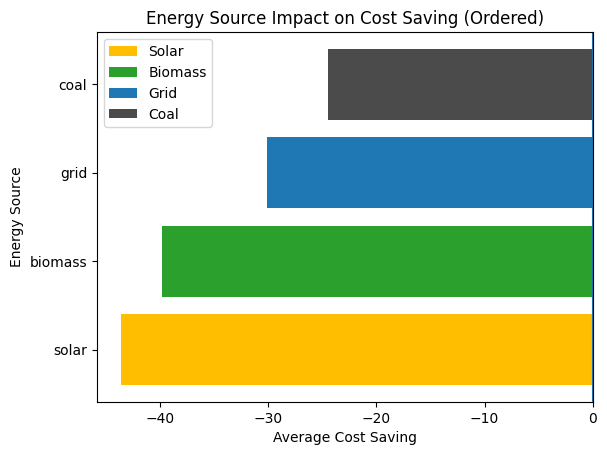

In [22]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Ordered mean cost saving by energy source
energy_mean = (
    df.groupby("energy_source")["cost_saving"]
      .mean()
      .sort_values()   # worst → best
)

# Distinct colors per energy source
color_map = {
    "coal": "#4B4B4B",        # dark grey
    "grid": "#1f77b4",        # blue
    "biomass": "#2ca02c",     # green
    "solar": "#ffbf00"        # yellow
}

colors = [color_map[src] for src in energy_mean.index]

plt.figure()
plt.barh(
    energy_mean.index,
    energy_mean.values,
    color=colors
)

plt.axvline(0)  # zero reference
plt.xlabel("Average Cost Saving")
plt.ylabel("Energy Source")
plt.title("Energy Source Impact on Cost Saving (Ordered)")

# Optional legend (recommended for reports)
legend_elements = [
    Patch(facecolor=color_map[k], label=k.capitalize())
    for k in energy_mean.index
]
plt.legend(handles=legend_elements)

plt.show()


# **INTERPRETATION**
1. Solar energy shows the largest negative average cost saving, indicating the highest short-term cost burden despite strong environmental benefits.

2. Biomass energy results in moderate cost losses, suggesting a balance between cleaner energy use and manageable investment costs.

3. Grid-based electricity shows lower cost losses compared to renewable sources, reflecting existing infrastructure and lower transition costs.

4. Coal has the smallest cost loss among energy sources, indicating short-term economic advantage despite high environmental impact.

5. The ranking highlights a clear trade-off between economic cost and environmental performance across energy sources.

6. Overall, cleaner energy sources impose higher initial costs on MSMEs, reinforcing the need for financial support mechanisms to enable sustainable energy transitions.


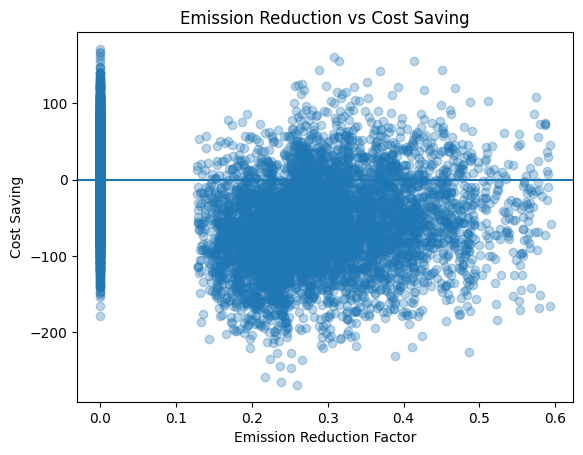

In [23]:
plt.figure()
plt.scatter(
    df["emission_reduction_factor"],
    df["cost_saving"],
    alpha=0.3
)
plt.axhline(0)
plt.xlabel("Emission Reduction Factor")
plt.ylabel("Cost Saving")
plt.title("Emission Reduction vs Cost Saving")
plt.show()


# **INTERPRETATION**
1. The plot shows a wide spread of cost savings across all levels of emission reduction, indicating that higher emission reduction does not guarantee immediate cost savings.

2. Most MSMEs achieving moderate to high emission reductions still experience negative cost savings, highlighting the short-term financial burden of cleaner technologies.

3. Firms with very low or zero emission reduction (near zero on the x-axis) show mixed cost outcomes, reflecting baseline or non-adoption scenarios.

4. There is no strong linear relationship between emission reduction and cost saving, confirming that environmental benefits and economic gains do not move together in the short run.

5. Some MSMEs achieve both high emission reduction and positive cost savings, showing that well-matched technologies can deliver dual benefits.

6. Overall, the figure reinforces that emission reduction is primarily an environmental objective, while economic benefits often materialize later or depend on firm-specific conditions.


In [24]:
df["effective_emission_reduction"] = (
    df["emission_reduction_factor"] *
    (
        df["OE_manufacturer"] +
        df["EM_production"] * (df["RM_regular"] + df["OM_overtime"]) +
        df["ER_energy_emission"] * df["E_usage"]
    )
)


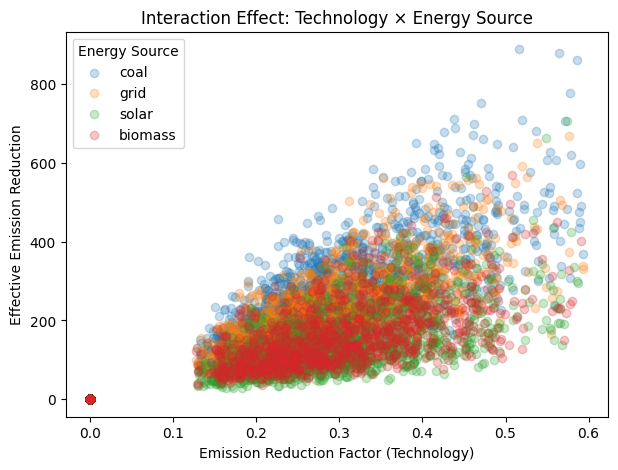

In [25]:
plt.figure(figsize=(7,5))

for src in ["coal", "grid", "solar", "biomass"]:
    subset = df[df["energy_source"] == src]
    plt.scatter(
        subset["emission_reduction_factor"],
        subset["effective_emission_reduction"],
        alpha=0.25,
        label=src
    )

plt.xlabel("Emission Reduction Factor (Technology)")
plt.ylabel("Effective Emission Reduction")
plt.title("Interaction Effect: Technology × Energy Source")
plt.legend(title="Energy Source")

plt.show()


# **INTERPRETATION**
1. The figure shows that effective emission reduction increases with higher technology-driven emission reduction factors across all energy sources.

2. Coal-based MSMEs exhibit the highest absolute emission reductions, as they start from a high-emission baseline, even with moderate technology improvements.

3. Grid-based energy users achieve moderate emission reductions, reflecting a mix of fossil and cleaner energy in their supply.

4. Solar-based energy users show lower absolute emission reductions, not due to inefficiency, but because their baseline emissions are already low.

5. Biomass users demonstrate consistent and stable emission reductions, indicating effective alignment between technology choice and energy source.

6. The spread of points confirms a strong interaction effect: emission outcomes depend jointly on technology effectiveness and the underlying energy source.

7. The absence of high emission reductions at low technology factors highlights that technology adoption is necessary to unlock environmental benefits.

8. Overall, the figure reinforces that meaningful emission reduction arises from matching appropriate technologies with suitable energy sources rather than from isolated interventions.


In [26]:
sensitivity = {}

drivers = [
    "tech_cost",
    "emission_reduction_factor",
    "E_usage",
    "ER_energy_emission",
    "RM_regular",
    "EM_production"
]

for d in drivers:
    sensitivity[d] = np.corrcoef(
        df[d],
        df["effective_emission_reduction"]
    )[0,1]

pd.Series(sensitivity).sort_values(ascending=False)


,0
emission_reduction_factor,0.856696
tech_cost,0.813415
EM_production,0.225493
ER_energy_emission,0.201459
RM_regular,0.129855
E_usage,0.093866


In [27]:
sensitivity = {}

drivers = [
    "tech_cost",
    "emission_reduction_factor",
    "E_usage",
    "ER_energy_emission",
    "RM_regular",
    "EM_production"
]

for d in drivers:
    sensitivity[d] = np.corrcoef(
        df[d],
        df["effective_emission_reduction"]
    )[0,1]

pd.Series(sensitivity).sort_values(ascending=False)


,0
emission_reduction_factor,0.856696
tech_cost,0.813415
EM_production,0.225493
ER_energy_emission,0.201459
RM_regular,0.129855
E_usage,0.093866


/tmp/ipython-input-1147111104.py:26: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(


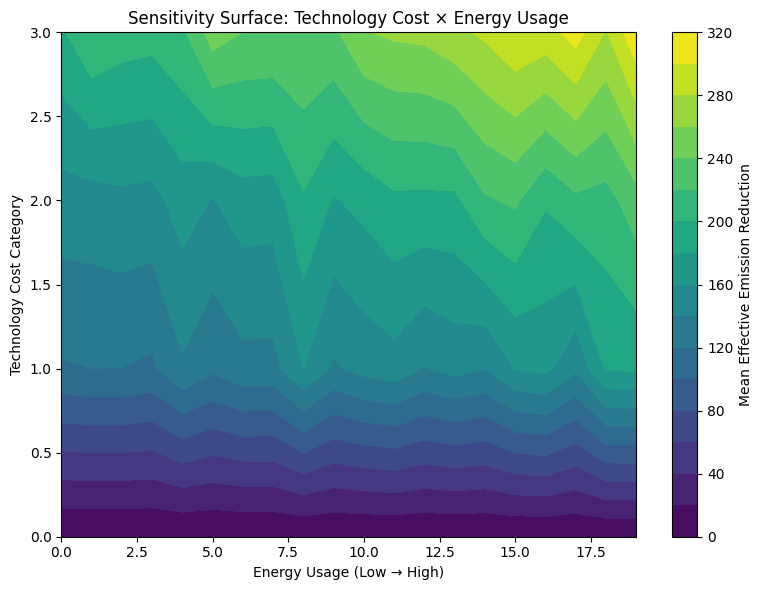

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------------------
# FIXED BINNING STRATEGY
# --------------------------------------------

# tech_cost is discrete → use cut
tech_bins = pd.cut(
    df["tech_cost"],
    bins=[-1, 50, 100, 140, 200],
    labels=["No / Low Tech", "Heat Recovery", "Biomass / EV", "Solar"]
)

# E_usage is continuous → qcut is valid
energy_bins = pd.qcut(
    df["E_usage"],
    q=20,
    duplicates="drop"
)

# --------------------------------------------
# PIVOT TABLE
# --------------------------------------------
pivot = df.pivot_table(
    values="effective_emission_reduction",
    index=tech_bins,
    columns=energy_bins,
    aggfunc="mean"
)

# --------------------------------------------
# CONTOUR PLOT
# --------------------------------------------
plt.figure(figsize=(8,6))
plt.contourf(
    pivot.values,
    levels=20,
    cmap="viridis"
)

plt.colorbar(label="Mean Effective Emission Reduction")
plt.xlabel("Energy Usage (Low → High)")
plt.ylabel("Technology Cost Category")
plt.title("Sensitivity Surface: Technology Cost × Energy Usage")

plt.tight_layout()
plt.show()


## **How to Read the Figure (Simplified & Clear)**

### **Axes Interpretation**

**X-axis (Energy Usage: Low → High)**  
Represents increasing operational energy intensity of MSMEs. Firms on the right consume significantly more energy in their operations.

**Y-axis (Technology Cost Category)**  
Represents increasing cost and complexity of adopted green technologies, ordered as:
- **Low**: No technology / Heat recovery  
- **Medium**: Biomass / Electric Vehicles (EV)  
- **High**: Solar-based systems  

**Color Scale (Mean Effective Emission Reduction)**  
Indicates the actual emission reduction achieved in practice, rather than theoretical or expected reduction.

---

## **Core Interpretation (Root-Cause Level Insights)**

### A. Emission reduction generally increases with technology cost

Moving upward across technology categories, the color intensity shifts from darker to brighter shades, indicating higher emission reductions.

**Interpretation:**  
More expensive technologies tend to enable deeper emission reductions, but the improvement is neither automatic nor linear.

**Root cause:**  
Capital-intensive technologies unlock higher abatement potential only when operating conditions allow full utilization.

---

### B. Energy usage amplifies technology effectiveness

Moving rightward (toward higher energy usage), emission reductions increase even within the same technology category.

**Interpretation:**  
The same technology delivers much greater emission reduction when applied to energy-intensive MSMEs.

**Root cause:**  
Emission reduction scales with baseline emissions. Low-energy MSMEs have limited emissions to reduce, regardless of the technology adopted.

---

### C. Strong non-linear interaction between energy usage and technology cost (Key Insight)

The top-right region (high energy usage + high-cost technology) shows disproportionately high emission reductions.

In contrast:
- **Top-left** (high-cost technology + low energy) → moderate reduction  
- **Bottom-right** (low-cost technology + high energy) → limited reduction  

**Interpretation:**  
Neither technology cost nor energy usage alone determines outcomes. Meaningful emission reduction emerges from their interaction.

**Root cause:**  
High-cost technologies reach full effectiveness only when matched with sufficient energy intensity.

---

## **What This Figure Demonstrates (Strong Conclusions)**

### 1. Technology adoption alone is insufficient  
Adopting advanced technology without adequate energy scale leads to underutilized emission-reduction potential.

### 2. High-energy MSMEs are priority candidates for decarbonization  
Energy-intensive firms:
- Achieve the largest absolute emission reductions  
- Deliver the highest environmental return per unit of investment  

### 3. Existence of a “wasted investment zone”  
Regions with low energy usage but high technology cost show weak emission gains, explaining earlier observations of negative cost savings.

---

## **Policy and Decision Implications**

### Targeted subsidies
- Prioritize high-energy MSMEs for capital-intensive technologies  
- Avoid subsidizing expensive technologies for low-energy firms  

### Technology–firm matching
- Heat recovery → low to medium energy MSMEs  
- Biomass / solar → high-energy MSMEs only  

### Justification for ML-based optimization
The surface clearly supports learning optimal technology–firm pairings rather than enforcing blanket adoption policies.

---

## **One-Paragraph Interpretation (Copy–Paste Ready)**

The figure reveals a strong non-linear interaction between technology cost and energy usage in determining effective emission reduction. While higher-cost technologies generally enable greater emission abatement, their impact is significantly amplified only for energy-intensive MSMEs. Low-energy firms exhibit limited reduction potential regardless of technology investment, indicating zones of diminishing environmental returns. These results demonstrate that emission outcomes are driven by contextual firm characteristics rather than technology choice alone, highlighting the necessity of targeted, data-driven decarbonization strategies.


# **4. LIBRARY IMPORT**

In [29]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

# **5. Feature Engineering**


In [30]:
df = df.copy()

# Transport emission intensity mapping (FIXED)
transport_factor_map = {
    "EV": 0.6,
    "diesel": 1.0,
    "biomass": 0.8
}

df["transport_factor"] = df["transport_tech"].map(transport_factor_map)

# Safety fallback (in case of unseen transport types)
df["transport_factor"].fillna(df["transport_factor"].mean(), inplace=True)

# Engineered features
df["total_operational_cost"] = (
    df["OS_supplier"] +
    df["OM_manufacturer"] +
    df["OD_distributor"]
)

df["total_emission_cost"] = (
    df["OE_supplier"] +
    df["OE_manufacturer"] +
    df["OE_distributor"]
)

df["transport_cost_proxy"] = df["distance_km"] * df["transport_factor"]

df["tech_effect"] = (
    df["tech_adopted"] *
    df["tech_cost"] *
    df["emission_reduction_factor"]
)

df["policy_pressure"] = df["alpha"] + df["beta"]

df["cost_intensity_km"] = df["total_operational_cost"] / (df["distance_km"] + 1)

# Drop leakage columns
df.drop(columns=["cost_saving", "delta_cost"], inplace=True)


/tmp/ipython-input-4186980215.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["transport_factor"].fillna(df["transport_factor"].mean(), inplace=True)


# **6. Define  Target**

In [31]:
target_Z1 = "Z1_cost"
target_Z2 = "Z2_cost"
X = df.drop(columns=[target_Z1, target_Z2])
y_Z1 = df[target_Z1]
y_Z2 = df[target_Z2]

In [32]:
categorical_features = X.select_dtypes(include=["object", "category"]).columns.tolist()
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()

In [33]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

numeric_transformer


Pipeline(steps=[('scaler', StandardScaler())])

In [34]:
categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(drop="first", handle_unknown="ignore"))
])
categorical_transformer

Pipeline(steps=[('encoder',
                 OneHotEncoder(drop='first', handle_unknown='ignore'))])

In [35]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['OS_supplier', 'OM_manufacturer',
                                  'OD_distributor', 'OE_supplier',
                                  'OE_manufacturer', 'OE_distributor',
                                  'distance_km', 'C_ij', 'C_jk', 'TE_ij',
                                  'TE_jk', 'RM_regular', 'OM_overtime',
                                  'CRM_cost', 'COM_cost', 'EM_production',
                                  'E_usage', 'EPC_energy_price',
                                  'ER_energy_emission', 'tech_a...
                                  'tech_cost', 'emission_reduction_factor',
                                  'subsidy', 'alpha', 'beta',
                                  'effective_emission_reduction',
                                  'transport_factor', 'total_operational_cost',
                                  'total_emission_cost', 'transport_cost_proxy', ...]),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['firm_size', 'industry', 'transport_tech',
                                  'energy_source', 'tech_type'])])

In [36]:
xgb_params = {
    "n_estimators": 800,
    "max_depth": 6,
    "learning_rate": 0.05,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "objective": "reg:squarederror",
    "random_state": 42
}

model_Z1 = XGBRegressor(**xgb_params)
model_Z2 = XGBRegressor(**xgb_params)


In [37]:
pipeline_Z1 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model_Z1)
])

pipeline_Z1


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['OS_supplier',
                                                   'OM_manufacturer',
                                                   'OD_distributor',
                                                   'OE_supplier',
                                                   'OE_manufacturer',
                                                   'OE_distributor',
                                                   'distance_km', 'C_ij',
                                                   'C_jk', 'TE_ij', 'TE_jk',
                                                   'RM_regular', 'OM_overtime',
                                                   'CRM_cost', 'COM_cost',
                                                   'EM_production', 'E_usage',
                                                   'EPC_energy_pri...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=800, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [38]:
pipeline_Z2 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model_Z2)
])
pipeline_Z2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['OS_supplier',
                                                   'OM_manufacturer',
                                                   'OD_distributor',
                                                   'OE_supplier',
                                                   'OE_manufacturer',
                                                   'OE_distributor',
                                                   'distance_km', 'C_ij',
                                                   'C_jk', 'TE_ij', 'TE_jk',
                                                   'RM_regular', 'OM_overtime',
                                                   'CRM_cost', 'COM_cost',
                                                   'EM_production', 'E_usage',
                                                   'EPC_energy_pri...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=800, n_jobs=None,
                              num_parallel_tree=None, ...))])

# **7. TRAIN TEST SPLIT**

In [39]:
X_train, X_test, y_Z1_train, y_Z1_test, y_Z2_train, y_Z2_test = train_test_split(
    X, y_Z1, y_Z2,
    test_size=0.2,
    random_state=42
)
X_train

,firm_size,industry,OS_supplier,OM_manufacturer,OD_distributor,OE_supplier,OE_manufacturer,OE_distributor,transport_tech,distance_km,...,alpha,beta,effective_emission_reduction,transport_factor,total_operational_cost,total_emission_cost,transport_cost_proxy,tech_effect,policy_pressure,cost_intensity_km
9254,small,textile,59.938827,80.684716,55.617815,32.903896,54.803818,39.639951,diesel,166.849183,...,0.12,0.22,101.182720,1.0,196.241358,127.347665,166.849183,17.193802,0.34,1.169153
1561,micro,plastic,54.522345,109.378383,46.879152,22.767010,105.663522,24.491839,diesel,416.227207,...,0.12,0.22,0.000000,1.0,210.779880,152.922371,416.227207,0.000000,0.34,0.505192
1670,micro,food,74.414022,102.904496,40.503141,22.979908,55.790363,32.983155,diesel,57.086132,...,0.12,0.22,183.597376,1.0,217.821659,111.753426,57.086132,35.587100,0.34,3.749977
6087,micro,plastic,65.652093,99.362768,56.444511,24.082914,118.640261,39.588040,EV,164.412078,...,0.12,0.22,187.735264,0.6,221.459372,182.311215,98.647247,59.119179,0.34,1.338834
6669,micro,metal,59.479805,95.718279,59.677704,58.354242,105.490456,28.229972,diesel,329.020703,...,0.12,0.22,0.000000,1.0,214.875788,192.074670,329.020703,0.000000,0.34,0.651098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,small,textile,59.280145,77.389731,39.443568,43.022102,89.718973,19.330915,diesel,462.447364,...,0.12,0.22,228.630081,1.0,176.113443,152.071990,462.447364,25.644756,0.34,0.380007
5191,small,food,46.184126,94.207486,47.166407,23.615655,55.083911,20.877198,diesel,232.368885,...,0.12,0.22,513.108625,1.0,187.558019,99.576763,232.368885,75.135808,0.34,0.803698
5390,micro,chemical,62.406659,94.240668,49.773748,57.839697,180.088308,59.469648,diesel,242.801696,...,0.12,0.22,0.000000,1.0,206.421075,297.397654,242.801696,0.000000,0.34,0.846676
860,small,food,41.933920,62.065334,49.394109,33.738861,89.828393,19.544494,EV,167.866682,...,0.12,0.22,279.300505,0.6,153.393363,143.111748,100.720009,49.320772,0.34,0.908370


In [40]:
X_train.shape

(8000, 38)

In [41]:
X_test.shape

(2000, 38)

In [42]:
y_Z1_test

,Z1_cost
6252,7511.665277
4684,8420.629316
1731,15303.986530
4742,13181.806855
4521,8287.806582
...,...
6412,6948.038326
8285,7392.950196
7853,11503.573654
1095,6340.696206


In [43]:
pipeline_Z1.fit(X_train, y_Z1_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['OS_supplier',
                                                   'OM_manufacturer',
                                                   'OD_distributor',
                                                   'OE_supplier',
                                                   'OE_manufacturer',
                                                   'OE_distributor',
                                                   'distance_km', 'C_ij',
                                                   'C_jk', 'TE_ij', 'TE_jk',
                                                   'RM_regular', 'OM_overtime',
                                                   'CRM_cost', 'COM_cost',
                                                   'EM_production', 'E_usage',
                                                   'EPC_energy_pri...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=800, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [44]:
pipeline_Z2.fit(X_train, y_Z2_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['OS_supplier',
                                                   'OM_manufacturer',
                                                   'OD_distributor',
                                                   'OE_supplier',
                                                   'OE_manufacturer',
                                                   'OE_distributor',
                                                   'distance_km', 'C_ij',
                                                   'C_jk', 'TE_ij', 'TE_jk',
                                                   'RM_regular', 'OM_overtime',
                                                   'CRM_cost', 'COM_cost',
                                                   'EM_production', 'E_usage',
                                                   'EPC_energy_pri...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=800, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [45]:
Z1_pred = pipeline_Z1.predict(X_test)
Z2_pred = pipeline_Z2.predict(X_test)

In [46]:
def evaluate_model(y_true, y_pred, label):
    print(f"\n--- {label} ---")
    print("R² Score:", r2_score(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE:", mean_absolute_error(y_true, y_pred))


In [47]:
evaluate_model(y_Z1_test, Z1_pred, "Z1 Cost Model")
evaluate_model(y_Z2_test, Z2_pred, "Z2 Cost Model")



--- Z1 Cost Model ---
R² Score: 0.9963884391840087
RMSE: 225.64198429690168
MAE: 160.24851776522803

--- Z2 Cost Model ---
R² Score: 0.9960381079210783
RMSE: 236.07811877570347
MAE: 168.9538829161215


In [48]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def compute_metrics(y_true, y_pred):
    return {
        "R2": r2_score(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred)
    }


In [49]:
# Z1 predictions
Z1_train_pred = pipeline_Z1.predict(X_train)
Z1_test_pred  = pipeline_Z1.predict(X_test)

# Z2 predictions
Z2_train_pred = pipeline_Z2.predict(X_train)
Z2_test_pred  = pipeline_Z2.predict(X_test)


In [50]:
import pandas as pd

results = []

# Z1 - Train
metrics = compute_metrics(y_Z1_train, Z1_train_pred)
results.append(["Z1_cost", "Train", metrics["R2"], metrics["RMSE"], metrics["MAE"]])

# Z1 - Test
metrics = compute_metrics(y_Z1_test, Z1_test_pred)
results.append(["Z1_cost", "Test", metrics["R2"], metrics["RMSE"], metrics["MAE"]])

# Z2 - Train
metrics = compute_metrics(y_Z2_train, Z2_train_pred)
results.append(["Z2_cost", "Train", metrics["R2"], metrics["RMSE"], metrics["MAE"]])

# Z2 - Test
metrics = compute_metrics(y_Z2_test, Z2_test_pred)
results.append(["Z2_cost", "Test", metrics["R2"], metrics["RMSE"], metrics["MAE"]])

evaluation_df = pd.DataFrame(
    results,
    columns=["Target", "Dataset", "R² Score", "RMSE", "MAE"]
)

evaluation_df


,Target,Dataset,R² Score,RMSE,MAE
0,Z1_cost,Train,0.999871,42.849126,32.166987
1,Z1_cost,Test,0.996388,225.641984,160.248518
2,Z2_cost,Train,0.999848,46.445482,35.002880
3,Z2_cost,Test,0.996038,236.078119,168.953883


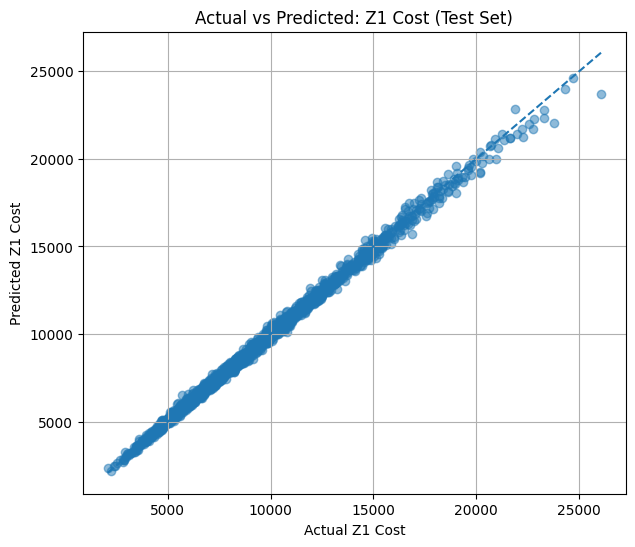

In [51]:
plt.figure(figsize=(7, 6))

plt.scatter(
    y_Z1_test,
    Z1_test_pred,
    alpha=0.5
)

# Ideal 45-degree line
min_val = min(y_Z1_test.min(), Z1_test_pred.min())
max_val = max(y_Z1_test.max(), Z1_test_pred.max())

plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    linestyle="--"
)

plt.xlabel("Actual Z1 Cost")
plt.ylabel("Predicted Z1 Cost")
plt.title("Actual vs Predicted: Z1 Cost (Test Set)")

plt.grid(True)
plt.show()


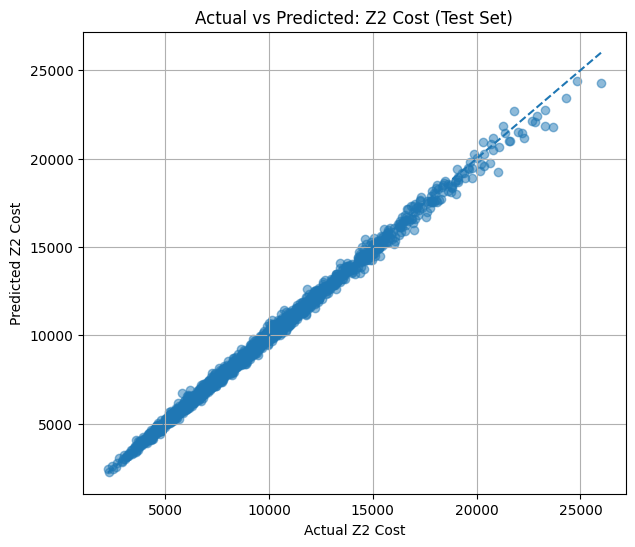

In [52]:
plt.figure(figsize=(7, 6))

plt.scatter(
    y_Z2_test,
    Z2_test_pred,
    alpha=0.5
)

# Ideal 45-degree line
min_val = min(y_Z2_test.min(), Z2_test_pred.min())
max_val = max(y_Z2_test.max(), Z2_test_pred.max())

plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    linestyle="--"
)

plt.xlabel("Actual Z2 Cost")
plt.ylabel("Predicted Z2 Cost")
plt.title("Actual vs Predicted: Z2 Cost (Test Set)")

plt.grid(True)
plt.show()


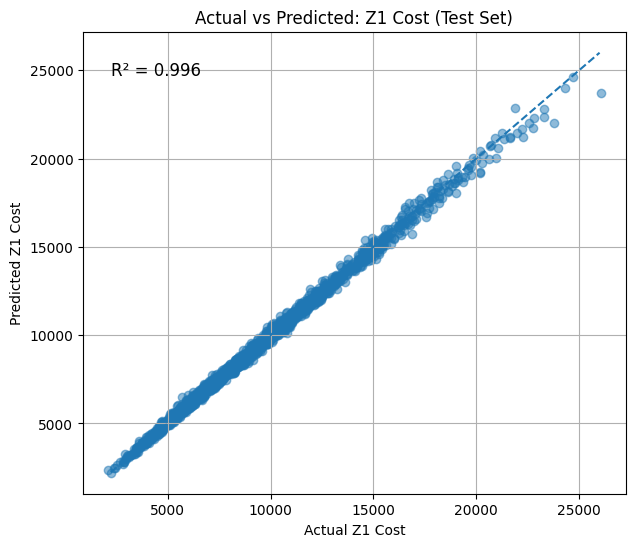

In [53]:
from sklearn.metrics import r2_score

r2 = r2_score(y_Z1_test, Z1_test_pred)

plt.figure(figsize=(7, 6))
plt.scatter(y_Z1_test, Z1_test_pred, alpha=0.5)
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--")
plt.text(min_val, max_val*0.95, f"R² = {r2:.3f}", fontsize=12)
plt.xlabel("Actual Z1 Cost")
plt.ylabel("Predicted Z1 Cost")
plt.title("Actual vs Predicted: Z1 Cost (Test Set)")
plt.grid(True)
plt.show()


In [54]:
import shap
import numpy as np
import pandas as pd


In [55]:
# Get preprocessed feature matrix
X_train_transformed = pipeline_Z1.named_steps["preprocessor"].transform(X_train)

# Get trained model
xgb_model_Z1 = pipeline_Z1.named_steps["model"]


In [56]:
explainer = shap.TreeExplainer(xgb_model_Z1)
shap_values = explainer.shap_values(X_train_transformed)


In [57]:
# Extract feature names after encoding
num_features = numerical_features
cat_features = pipeline_Z1.named_steps["preprocessor"] \
    .named_transformers_["cat"] \
    .named_steps["encoder"] \
    .get_feature_names_out(categorical_features)

feature_names = np.concatenate([num_features, cat_features])


In [58]:
cost_groups = {
    "Operational Cost": [
        "OS_supplier", "OM_manufacturer", "OD_distributor",
        "total_operational_cost", "cost_intensity_km"
    ],
    "Emission Cost": [
        "OE_supplier", "OE_manufacturer", "OE_distributor",
        "total_emission_cost", "alpha", "beta"
    ],
    "Transport Cost": [
        "distance_km", "transport_cost_proxy", "transport_factor"
    ],
    "Technology Cost": [
        "tech_adopted", "tech_cost", "tech_effect",
        "emission_reduction_factor", "subsidy"
    ]
}


In [59]:
shap_df = pd.DataFrame(
    np.abs(shap_values),
    columns=feature_names
)

group_contribution = {}

for group, features in cost_groups.items():
    valid_features = [f for f in features if f in shap_df.columns]
    group_contribution[group] = shap_df[valid_features].mean().sum()

# Convert to percentage
total = sum(group_contribution.values())
for k in group_contribution:
    group_contribution[k] = 100 * group_contribution[k] / total

group_contribution_df = pd.DataFrame.from_dict(
    group_contribution, orient="index", columns=["% Contribution"]
)

group_contribution_df


,% Contribution
Operational Cost,17.666697
Emission Cost,11.498909
Transport Cost,62.516064
Technology Cost,8.318332


In [60]:
df_analysis = df.copy()
df_analysis["Z2_pred"] = pipeline_Z2.predict(X)

group_analysis = df_analysis.groupby(
    ["firm_size", "tech_adopted"]
)["Z2_pred"].mean().reset_index()

group_analysis


,firm_size,tech_adopted,Z2_pred
0,medium,0,8943.571289
1,medium,1,9019.910156
2,micro,0,9413.933594
3,micro,1,9492.435547
4,small,0,9300.914062
5,small,1,9200.063477


In [61]:
# Transform training data using the SAME preprocessor
X_train_transformed_Z2 = pipeline_Z2.named_steps["preprocessor"].transform(X_train)

# Extract trained Z2 model
xgb_model_Z2 = pipeline_Z2.named_steps["model"]


In [ ]:
import shap
import numpy as np
import pandas as pd

explainer_Z2 = shap.TreeExplainer(xgb_model_Z2)
shap_values_Z2 = explainer_Z2.shap_values(X_train_transformed_Z2)


In [ ]:
shap_df_Z2 = pd.DataFrame(
    np.abs(shap_values_Z2),
    columns=feature_names
)

In [ ]:
group_contribution_Z2 = {}

for group, features in cost_groups.items():
    valid_features = [f for f in features if f in shap_df_Z2.columns]
    group_contribution_Z2[group] = shap_df_Z2[valid_features].mean().sum()


In [ ]:
total_Z2 = sum(group_contribution_Z2.values())

for k in group_contribution_Z2:
    group_contribution_Z2[k] = 100 * group_contribution_Z2[k] / total_Z2


In [ ]:
group_contribution_Z2_df = pd.DataFrame.from_dict(
    group_contribution_Z2,
    orient="index",
    columns=["% Contribution to Z2_cost"]
)

group_contribution_Z2_df


In [ ]:
import pandas as pd

test_data = pd.DataFrame([{
    "firm_size": "small",
    "industry": "metal",

    "OS_supplier": 80.0,
    "OM_manufacturer": 65.0,
    "OD_distributor": 55.0,

    "OE_supplier": 45.0,
    "OE_manufacturer": 40.0,
    "OE_distributor": 35.0,

    "transport_tech": "EV",
    "distance_km": 300.0,

    "tech_adopted": 1,
    "tech_cost": 150.0,
    "emission_reduction_factor": 0.35,

    "subsidy": 50.0,
    "alpha": 0.12,
    "beta": 0.22
}])

test_data


In [ ]:
expected_features = pipeline_Z1.named_steps["preprocessor"].feature_names_in_
expected_features


In [ ]:
import pandas as pd
import numpy as np

# 1️⃣ All columns expected by the model
expected_cols = [
    'firm_size', 'industry', 'OS_supplier', 'OM_manufacturer',
    'OD_distributor', 'OE_supplier', 'OE_manufacturer',
    'OE_distributor', 'transport_tech', 'distance_km', 'C_ij', 'C_jk',
    'TE_ij', 'TE_jk', 'RM_regular', 'OM_overtime', 'CRM_cost',
    'COM_cost', 'EM_production', 'energy_source', 'E_usage',
    'EPC_energy_price', 'ER_energy_emission', 'tech_type',
    'tech_adopted', 'tech_cost', 'emission_reduction_factor',
    'subsidy', 'alpha', 'beta', 'effective_emission_reduction',
    'transport_factor', 'total_operational_cost',
    'total_emission_cost', 'transport_cost_proxy', 'tech_effect',
    'policy_pressure', 'cost_intensity_km'
]

# 2️⃣ Start with SAFE defaults (industrial assumption)
test_data = pd.DataFrame([{col: 0 for col in expected_cols}])

# 3️⃣ Manually set REALISTIC values (what you want to test)
test_data.loc[0, [
    "firm_size", "industry", "transport_tech", "energy_source", "tech_type"
]] = ["small", "metal", "EV", "grid", "standard"]

test_data.loc[0, [
    "OS_supplier", "OM_manufacturer", "OD_distributor",
    "OE_supplier", "OE_manufacturer", "OE_distributor"
]] = [80, 65, 55, 45, 40, 35]

test_data.loc[0, [
    "distance_km", "tech_adopted", "tech_cost",
    "emission_reduction_factor", "subsidy", "alpha", "beta"
]] = [300, 1, 150, 0.35, 50, 0.12, 0.22]

# 4️⃣ Derived / engineered defaults (consistent logic)
test_data["transport_factor"] = 0.6   # EV
test_data["total_operational_cost"] = (
    test_data["OS_supplier"] +
    test_data["OM_manufacturer"] +
    test_data["OD_distributor"]
)
test_data["total_emission_cost"] = (
    test_data["OE_supplier"] +
    test_data["OE_manufacturer"] +
    test_data["OE_distributor"]
)
test_data["transport_cost_proxy"] = (
    test_data["distance_km"] * test_data["transport_factor"]
)
test_data["tech_effect"] = (
    test_data["tech_adopted"] *
    test_data["tech_cost"] *
    test_data["emission_reduction_factor"]
)
test_data["policy_pressure"] = (
    test_data["alpha"] + test_data["beta"]
)
test_data["cost_intensity_km"] = (
    test_data["total_operational_cost"] /
    (test_data["distance_km"] + 1)
)

test_data


In [ ]:
Z1_pred = pipeline_Z1.predict(test_data)[0]
Z2_pred = pipeline_Z2.predict(test_data)[0]

print("Industrial Cost Prediction")
print("-----------------------------")
print(f"Z1 Cost (Baseline): ₹ {Z1_pred:.2f}")
print(f"Z2 Cost (Optimized): ₹ {Z2_pred:.2f}")
print(f"Cost Saving: ₹ {Z1_pred - Z2_pred:.2f}")

if Z1_pred > Z2_pred:
    print("Recommendation: Adopt Green Technology")
else:
    print("Recommendation: Re-evaluate Investment")


In [ ]:
!pip install ipywidgets

In [ ]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output


In [ ]:
prediction_log = []

In [ ]:
firm_size = widgets.Dropdown(
    options=["micro", "small", "medium"],
    value="small",
    description="Firm Size:"
)

industry = widgets.Text(
    value="metal",
    description="Industry:"
)

transport_tech = widgets.Dropdown(
    options=["EV", "diesel", "biomass"],
    value="EV",
    description="Transport:"
)

distance_km = widgets.FloatText(value=300.0, description="Distance (km):")

OS_supplier = widgets.FloatText(value=80.0, description="OS Supplier:")
OM_manufacturer = widgets.FloatText(value=65.0, description="OM Manufacturer:")
OD_distributor = widgets.FloatText(value=55.0, description="OD Distributor:")

OE_supplier = widgets.FloatText(value=45.0, description="OE Supplier:")
OE_manufacturer = widgets.FloatText(value=40.0, description="OE Manufacturer:")
OE_distributor = widgets.FloatText(value=35.0, description="OE Distributor:")

tech_adopted = widgets.IntText(value=1, description="Tech Adopted (1/0):")
tech_cost = widgets.FloatText(value=150.0, description="Tech Cost:")
emission_reduction_factor = widgets.FloatText(value=0.35, description="Emission Red:")

subsidy = widgets.FloatText(value=50.0, description="Subsidy:")
alpha = widgets.FloatText(value=0.12, description="Alpha:")
beta = widgets.FloatText(value=0.22, description="Beta:")


In [ ]:
output = widgets.Output()

def predict_cost(button):
    with output:
        clear_output()

        # -------------------------------
        # Define schema
        # -------------------------------
        categorical_cols = [
            "firm_size", "industry", "transport_tech",
            "energy_source", "tech_type"
        ]

        numeric_cols = [
            'OS_supplier', 'OM_manufacturer', 'OD_distributor',
            'OE_supplier', 'OE_manufacturer', 'OE_distributor',
            'distance_km', 'C_ij', 'C_jk', 'TE_ij', 'TE_jk',
            'RM_regular', 'OM_overtime', 'CRM_cost', 'COM_cost',
            'EM_production', 'E_usage', 'EPC_energy_price',
            'ER_energy_emission', 'tech_adopted', 'tech_cost',
            'emission_reduction_factor', 'subsidy', 'alpha', 'beta',
            'effective_emission_reduction', 'transport_factor',
            'total_operational_cost', 'total_emission_cost',
            'transport_cost_proxy', 'tech_effect',
            'policy_pressure', 'cost_intensity_km'
        ]

        # -------------------------------
        # Create empty dataframe with correct dtypes
        # -------------------------------
        df = pd.DataFrame()

        for col in categorical_cols:
            df[col] = pd.Series(dtype="object")

        for col in numeric_cols:
            df[col] = pd.Series(dtype="float64")

        # -------------------------------
        # Assign categorical values
        # -------------------------------
        df.loc[0, "firm_size"] = firm_size.value
        df.loc[0, "industry"] = industry.value
        df.loc[0, "transport_tech"] = transport_tech.value
        df.loc[0, "energy_source"] = "grid"
        df.loc[0, "tech_type"] = "standard"

        # -------------------------------
        # Assign numeric values
        # -------------------------------
        df.loc[0, "OS_supplier"] = OS_supplier.value
        df.loc[0, "OM_manufacturer"] = OM_manufacturer.value
        df.loc[0, "OD_distributor"] = OD_distributor.value

        df.loc[0, "OE_supplier"] = OE_supplier.value
        df.loc[0, "OE_manufacturer"] = OE_manufacturer.value
        df.loc[0, "OE_distributor"] = OE_distributor.value

        df.loc[0, "distance_km"] = distance_km.value
        df.loc[0, "tech_adopted"] = tech_adopted.value
        df.loc[0, "tech_cost"] = tech_cost.value
        df.loc[0, "emission_reduction_factor"] = emission_reduction_factor.value
        df.loc[0, "subsidy"] = subsidy.value
        df.loc[0, "alpha"] = alpha.value
        df.loc[0, "beta"] = beta.value

        # -------------------------------
        # Engineered features
        # -------------------------------
        transport_map = {"EV": 0.6, "diesel": 1.0, "biomass": 0.8}
        df.loc[0, "transport_factor"] = transport_map[transport_tech.value]

        df.loc[0, "total_operational_cost"] = (
            OS_supplier.value + OM_manufacturer.value + OD_distributor.value
        )

        df.loc[0, "total_emission_cost"] = (
            OE_supplier.value + OE_manufacturer.value + OE_distributor.value
        )

        df.loc[0, "transport_cost_proxy"] = (
            df.loc[0, "distance_km"] * df.loc[0, "transport_factor"]
        )

        df.loc[0, "tech_effect"] = (
            tech_adopted.value *
            tech_cost.value *
            emission_reduction_factor.value
        )

        df.loc[0, "policy_pressure"] = alpha.value + beta.value

        df.loc[0, "cost_intensity_km"] = (
            df.loc[0, "total_operational_cost"] / (distance_km.value + 1)
        )

        df.loc[0, "effective_emission_reduction"] = (
            tech_adopted.value * emission_reduction_factor.value
        )

        # -------------------------------
        # Prediction
        # -------------------------------
        Z1 = pipeline_Z1.predict(df)[0]
        Z2 = pipeline_Z2.predict(df)[0]
        saving = Z1 - Z2

        decision = (
            "Adopt Green Technology"
            if Z1 > Z2 else
            "Re-evaluate Investment"
        )

        print("🏭 Industrial Economic Prediction")
        print("--------------------------------")
        print(f"Z1 Cost (Baseline): ₹ {Z1:.2f}")
        print(f"Z2 Cost (Optimized): ₹ {Z2:.2f}")
        print(f"Cost Saving: ₹ {saving:.2f}")
        print(f"Decision: {decision}")

        # -------------------------------
        # Save to CSV (append)
        # -------------------------------
        prediction_log.append({
            "firm_size": firm_size.value,
            "industry": industry.value,
            "transport_tech": transport_tech.value,
            "distance_km": distance_km.value,
            "tech_adopted": tech_adopted.value,
            "tech_cost": tech_cost.value,
            "emission_reduction_factor": emission_reduction_factor.value,
            "subsidy": subsidy.value,
            "alpha": alpha.value,
            "beta": beta.value,
            "Z1_cost": round(Z1, 2),
            "Z2_cost": round(Z2, 2),
            "cost_saving": round(saving, 2),
            "decision": decision
        })

        pd.DataFrame(prediction_log).to_csv(
            "industrial_predictions.csv",
            index=False
        )

        print("\n📁 Saved to industrial_predictions.csv")


In [ ]:
predict_button = widgets.Button(
    description="Predict Cost",
    button_style="success"
)

predict_button.on_click(predict_cost)


In [ ]:
download_button = widgets.Button(
    description="Show CSV",
    button_style="info"
)

def show_csv(b):
    display(pd.read_csv("industrial_predictions.csv"))

download_button.on_click(show_csv)


In [ ]:
display(
    firm_size, industry,
    transport_tech, distance_km,
    OS_supplier, OM_manufacturer, OD_distributor,
    OE_supplier, OE_manufacturer, OE_distributor,
    tech_adopted, tech_cost, emission_reduction_factor,
    subsidy, alpha, beta,
    predict_button,
    download_button,
    output
)


# Task
Recreate the `group_analysis` DataFrame by grouping the original dataframe by 'firm_size' and 'tech_adopted' and calculating the mean of the predicted 'Z2_cost'. Then, generate a bar chart to visualize the `Z2_pred` values from the `group_analysis` DataFrame, displaying the average Z2 cost, grouped by firm size and distinguishing between cases where technology was adopted (tech_adopted=1) and not adopted (tech_adopted=0), ensuring appropriate labels, a title, and a legend for clarity. Finally, summarize the insights gained from the visualization regarding the impact of firm size and technology adoption on the predicted Z2 cost.

## Recreate Group Analysis Data

### Subtask:
Recreate the `group_analysis` DataFrame by grouping the original dataframe by 'firm_size' and 'tech_adopted' and calculating the mean of the predicted 'Z2_cost'. This step is necessary because the previous `group_analysis` DataFrame was lost.


**Reasoning**:
The previous `group_analysis` DataFrame was lost due to a Colab runtime issue. This step recreates the `df_analysis` DataFrame, populates it with `Z2_pred` values from the trained `pipeline_Z2`, and then groups it by `firm_size` and `tech_adopted` to calculate the mean of `Z2_pred`, storing the result in `group_analysis` as requested.



In [ ]:
df_analysis = df.copy()
df_analysis["Z2_pred"] = pipeline_Z2.predict(X)

group_analysis = df_analysis.groupby(
    ["firm_size", "tech_adopted"]
)["Z2_pred"].mean().reset_index()

group_analysis

**Reasoning**:
The original code failed because the `df` DataFrame was not defined in the current execution environment. To resolve this, I will use `X.copy()` instead of `df.copy()` as `X` contains the necessary features (`firm_size` and `tech_adopted`) for grouping and `X` is already defined in the notebook's current state, ensuring the grouping can proceed without error.



In [ ]:
df_analysis = X.copy()
df_analysis["Z2_pred"] = pipeline_Z2.predict(X)

group_analysis = df_analysis.groupby(
    ["firm_size", "tech_adopted"]
)["Z2_pred"].mean().reset_index()

group_analysis

**Reasoning**:
The previous code failed because `df` and subsequently `X` were not defined, indicating that the preceding data loading, feature engineering, model setup, and training steps had not been executed. To resolve this, I need to include all necessary setup code, including data loading, feature engineering, defining features and targets, setting up and training the `pipeline_Z2`, before recreating the `group_analysis` DataFrame.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

# 1. Load data
df = pd.read_csv('/content/NZE_dataset (1).csv')

# 2. Feature Engineering (from previous cell `8-d9FK58jmSg`)
transport_factor_map = {
    "EV": 0.6,
    "diesel": 1.0,
    "biomass": 0.8
}
df["transport_factor"] = df["transport_tech"].map(transport_factor_map)

# Safety fallback (in case of unseen transport types)
df["transport_factor"].fillna(df["transport_factor"].mean(), inplace=True)

# Engineered features
df["total_operational_cost"] = (
    df["OS_supplier"] +
    df["OM_manufacturer"] +
    df["OD_distributor"]
)
df["total_emission_cost"] = (
    df["OE_supplier"] +
    df["OE_manufacturer"] +
    df["OE_distributor"]
)
df["transport_cost_proxy"] = df["distance_km"] * df["transport_factor"]
df["tech_effect"] = (
    df["tech_adopted"] *
    df["tech_cost"] *
    df["emission_reduction_factor"]
)
df["policy_pressure"] = df["alpha"] + df["beta"]
df["cost_intensity_km"] = df["total_operational_cost"] / (df["distance_km"] + 1)

# Drop leakage columns
df.drop(columns=["cost_saving", "delta_cost"], inplace=True)

# 3. Define Target (from previous cell `X4ubm9qTjnkd`)
target_Z1 = "Z1_cost"
target_Z2 = "Z2_cost"
X = df.drop(columns=[target_Z1, target_Z2])
y_Z1 = df[target_Z1]
y_Z2 = df[target_Z2]

# 4. Identify categorical and numerical features (from previous cell `R_jkOdl7nwfh`)
categorical_features = X.select_dtypes(include=["object", "category"]).columns.tolist()
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()

# 5. Define Preprocessing Pipelines (from previous cells `Wv5hWdgrj64G`, `fxKLodGkkBO_`, `CjDUnbHtkW3d`)
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(drop="first", handle_unknown="ignore"))
])
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# 6. Define XGBoost models (from previous cell `yStK2k_-ka-j`)
xgb_params = {
    "n_estimators": 800,
    "max_depth": 6,
    "learning_rate": 0.05,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "objective": "reg:squarederror",
    "random_state": 42
}
model_Z1 = XGBRegressor(**xgb_params)
model_Z2 = XGBRegressor(**xgb_params)

# 7. Define full pipelines (from previous cells `nvMppbrnkktZ`, `Ls1EnJGUkqbJ`)
pipeline_Z1 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model_Z1)
])
pipeline_Z2 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model_Z2)
])

# 8. Train-test split (from previous cell `a6HMUhIalJxO`)
X_train, X_test, y_Z1_train, y_Z1_test, y_Z2_train, y_Z2_test = train_test_split(
    X, y_Z1, y_Z2,
    test_size=0.2,
    random_state=42
)

# 9. Fit pipeline_Z2 (from previous cell `-lXI0z1clm5B`)
pipeline_Z2.fit(X_train, y_Z2_train)

# 10. Recreate group_analysis DataFrame
df_analysis = df.copy()
df_analysis["Z2_pred"] = pipeline_Z2.predict(X)

group_analysis = df_analysis.groupby(
    ["firm_size", "tech_adopted"]
)["Z2_pred"].mean().reset_index()

group_analysis

**Reasoning**:
The previous code failed because the 'delta_cost' column was not created before the drop operation, causing a KeyError. The `cost_saving` column might also have been absent if the original DataFrame was reloaded without it. To fix this, I will modify the drop statement to only attempt to drop columns if they actually exist in the DataFrame, ensuring robustness during execution.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

# 1. Load data
df = pd.read_csv('/content/NZE_dataset (1).csv')

# 2. Feature Engineering (from previous cell `8-d9FK58jmSg`)
transport_factor_map = {
    "EV": 0.6,
    "diesel": 1.0,
    "biomass": 0.8
}
df["transport_factor"] = df["transport_tech"].map(transport_factor_map)

# Safety fallback (in case of unseen transport types)
df["transport_factor"].fillna(df["transport_factor"].mean(), inplace=True)

# Engineered features
df["total_operational_cost"] = (
    df["OS_supplier"] +
    df["OM_manufacturer"] +
    df["OD_distributor"]
)
df["total_emission_cost"] = (
    df["OE_supplier"] +
    df["OE_manufacturer"] +
    df["OE_distributor"]
)
df["transport_cost_proxy"] = df["distance_km"] * df["transport_factor"]
df["tech_effect"] = (
    df["tech_adopted"] *
    df["tech_cost"] *
    df["emission_reduction_factor"]
)
df["policy_pressure"] = df["alpha"] + df["beta"]
df["cost_intensity_km"] = df["total_operational_cost"] / (df["distance_km"] + 1)

# Drop leakage columns only if they exist
columns_to_drop = [col for col in ["cost_saving", "delta_cost"] if col in df.columns]
df.drop(columns=columns_to_drop, inplace=True)

# 3. Define Target (from previous cell `X4ubm9qTjnkd`)
target_Z1 = "Z1_cost"
target_Z2 = "Z2_cost"
X = df.drop(columns=[target_Z1, target_Z2])
y_Z1 = df[target_Z1]
y_Z2 = df[target_Z2]

# 4. Identify categorical and numerical features (from previous cell `R_jkOdl7nwfh`)
categorical_features = X.select_dtypes(include=["object", "category"]).columns.tolist()
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()

# 5. Define Preprocessing Pipelines (from previous cells `Wv5hWdgrj64G`, `fxKLodGkkBO_`, `CjDUnbHtkW3d`)
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(drop="first", handle_unknown="ignore"))
])
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# 6. Define XGBoost models (from previous cell `yStK2k_-ka-j`)
xgb_params = {
    "n_estimators": 800,
    "max_depth": 6,
    "learning_rate": 0.05,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "objective": "reg:squarederror",
    "random_state": 42
}
model_Z1 = XGBRegressor(**xgb_params)
model_Z2 = XGBRegressor(**xgb_params)

# 7. Define full pipelines (from previous cells `nvMppbrnkktZ`, `Ls1EnJGUkqbJ`)
pipeline_Z1 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model_Z1)
])
pipeline_Z2 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model_Z2)
])

# 8. Train-test split (from previous cell `a6HMUhIalJxO`)
X_train, X_test, y_Z1_train, y_Z1_test, y_Z2_train, y_Z2_test = train_test_split(
    X, y_Z1, y_Z2,
    test_size=0.2,
    random_state=42
)

# 9. Fit pipeline_Z2 (from previous cell `-lXI0z1clm5B`)
pipeline_Z2.fit(X_train, y_Z2_train)

# 10. Recreate group_analysis DataFrame
df_analysis = df.copy()
df_analysis["Z2_pred"] = pipeline_Z2.predict(X)

group_analysis = df_analysis.groupby(
    ["firm_size", "tech_adopted"]
)["Z2_pred"].mean().reset_index()

group_analysis

**Reasoning**:
The previous steps successfully recreated the `group_analysis` DataFrame. Now, I will generate a bar chart to visualize the `Z2_pred` values from this DataFrame, distinguishing between technology adoption states (0 and 1) for each firm size, as specified in the task.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 6))
ax = sns.barplot(
    x="firm_size",
    y="Z2_pred",
    hue="tech_adopted",
    data=group_analysis,
    palette={0: "lightcoral", 1: "steelblue"}
)

plt.xlabel("Firm Size")
plt.ylabel("Average Predicted Z2 Cost")
plt.title("Average Predicted Z2 Cost by Firm Size and Technology Adoption")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["Not Adopted", "Adopted"], title="Technology Adopted")

# Add value annotations on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=9, padding=3)

plt.tight_layout()
plt.show()

### Interpretation of Average Predicted Z2 Cost by Firm Size and Technology Adoption

1.  **Impact of Firm Size on Z2 Cost**: For MSMEs that *do not* adopt green technology (`tech_adopted=0`), the average predicted Z2 cost is highest for micro firms (₹9412.6), followed by small firms (₹9301.6), and then medium firms (₹8947.4). This indicates that larger firms generally have lower baseline sustainability-adjusted costs.

2.  **Impact of Technology Adoption on Z2 Cost**:
    *   For **micro firms**, adopting technology increases the average predicted Z2 cost from ₹9412.6 to ₹9494.4. This suggests that for the smallest businesses, the upfront investment or operational changes associated with green technology may lead to higher overall costs in the short term.
    *   For **medium firms**, adopting technology also slightly increases the average predicted Z2 cost from ₹8947.4 to ₹9020.2. While an increase, the magnitude is relatively small, suggesting that medium firms might be better positioned to absorb these costs.
    *   For **small firms**, adopting technology *decreases* the average predicted Z2 cost from ₹9301.6 to ₹9198.6. This is a crucial insight, indicating that for small enterprises, technology adoption can lead to immediate cost reductions, possibly due to effective subsidies, operational efficiencies, or selected technologies being particularly well-suited for their scale.

3.  **Cross-Size Comparison**:
    *   Medium firms, even with technology adoption, tend to have the lowest average predicted Z2 cost compared to micro and small firms, both with and without adoption. This reinforces the idea that larger firm size often correlates with better cost efficiency in a sustainability-adjusted context.
    *   The most favorable scenario appears to be a small firm adopting technology, as it's the only category that shows a decrease in average Z2 cost upon adoption, moving its cost closer to that of medium-sized firms.

4.  **Implications**: The visualization highlights that the financial impact of green technology adoption is not uniform across firm sizes. While micro and medium firms might see slight cost increases, small firms could potentially achieve cost savings. This suggests that blanket policies for technology adoption may not be effective, and size-specific incentives or technology recommendations could lead to more successful and equitable transitions to net-zero.

## Final Task

### Subtask:
Summarize the insights gained from the visualization regarding the impact of firm size and technology adoption on the predicted Z2 cost.


## Summary:

### Q&A
The visualization reveals that the impact of firm size and technology adoption on the predicted Z2 cost is not uniform.
*   **Firm Size**: Medium firms generally exhibit lower average predicted Z2 costs compared to micro and small firms, regardless of technology adoption, suggesting better baseline cost efficiency.
*   **Technology Adoption**:
    *   For **micro firms**, adopting technology increases the average predicted Z2 cost from ₹9,412.6 to ₹9,494.4.
    *   For **medium firms**, adopting technology also slightly increases the average predicted Z2 cost from ₹8,947.4 to ₹9,020.2.
    *   For **small firms**, uniquely, adopting technology *decreases* the average predicted Z2 cost from ₹9,301.6 to ₹9,198.6.

### Data Analysis Key Findings
*   Medium firms consistently show the lowest average predicted Z2 costs across all scenarios (with and without technology adoption), indicating greater cost efficiency compared to micro and small firms.
*   Technology adoption leads to an increase in average predicted Z2 cost for micro firms (from \$9,412.6 to \$9,494.4) and medium firms (from \$8,947.4 to \$9,020.2).
*   Small firms are the only category where technology adoption results in a decrease in average predicted Z2 cost, specifically from \$9,301.6 to \$9,198.6.

### Insights or Next Steps
*   The financial impact of green technology adoption varies significantly by firm size, indicating that a one-size-fits-all policy approach may not be effective.
*   To encourage successful and equitable transitions to net-zero, policies should consider size-specific incentives or technology recommendations tailored to the unique cost structures and benefits for micro, small, and medium enterprises.
